In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train

In [4]:
import ast

In [5]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [41]:
data = train.read_all_anytask()

In [7]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
            else:
                print("Failed")
    
    data[handle] = current

Failed
Failed
Failed
Failed
Failed
Failed


In [8]:
def filter_people(df, people):
    result = {}
    for handle, result_for_handle in df.items():
        if handle in people:
            result[handle] = result_for_handle
    
    return result

In [9]:
def filter_ast_size(df, mn=0, mx=500):
    result = {}
    for handle, result_for_handle in df.items():
        current_result = {}
        for problem, submission in result_for_handle.items():
            try:
                parsed = ast.parse(submission)
                length = len(list(ast.walk(parsed)))
                print(length)
                if length >= mn and length <= mx:
                    current_result[problem] = submission
            except:
                pass
            
        result[handle] = current_result
    
    return result

In [42]:
data = filter_ast_size(data, mn=0, mx=4000)

32
2352
1194
250
49
176
67
51
83
639
35
62
183
1881
639
543
582
174
709
139
1532
134
83
233
115
447
35
67
11171
87
20
571
62
168
127
77
149
1257
1755
660
223
705
4399
1927
73
255
66
719
148
577
92
494
247
671
831
41
642
951
1004
1654
186
76
372
93
1772
169
181
46
1691
475
237
469
1155
1689
115
884
108
143
96
100
41
105
29
209
20
73
411
160
632
614
32
1348
396
146
55
68
128
20
67
260
1677
491
586
584
83
542
73
1562
69
139
200
99
443
47
40
116
205
134
83
55
70
120
85
257
18
39
595
208
1331
44
668
1259
218
1243
52
140
63
70
1255
83
1579
1042
20
69
233
415
1784
1042
606
873
140
632
129
1639
50
88
251
227
621
31
576
516
1389
75
541
681
1243
83
80
937
53
84
109
531
20
75
675
1351
590
517
1007
258
50
69
75
182
20
304
2124
445
26
653
63
426
89
1708
79
51
105
10
114
250
127
62
20
62
570
225
91
78
47
717
1985
837
213
85
54
72
100
746
25
107
312
1180
514
592
763
107
684
99
2754
119
81
276
131
739
41
1733
1584
188
46
72
208
118
20
65
203
1600
390
395
471
68
1316
84
1536
67
87
156
67
354
38
1243
20

In [74]:
for code in data['Dragunov_Nikita'].values():
    print(code)
    print("\n\n=========================================\n\n")

import numpy as np
import oracles
import time


from sklearn.base import BaseEstimator


class PEGASOSMethod(BaseEstimator):
    """
    Реализация метода Pegasos для решения задачи svm.
    """
    def __init__(self, step_lambda=1, num_iter=10000, batch_size=None, C=10):
        """
        step_lambda - величина шага, соответствует 
        
        batch_size - размер батча
        
        num_iter - число итераций метода, предлагается делать константное
        число итераций 
        """
        self.step_lambda = step_lambda
        self.batch_size = batch_size
        self.num_iter = num_iter
        self.C = C
        
    def fit(self, X, y, tolerance=1e-5, trace=False):
        """
        Обучение метода по выборке X с ответами y
        
        X - scipy.sparse.csr_matrix или двумерный numpy.array
        
        y - одномерный numpy array
        
        trace - переменная типа bool
      
        Если trace = True, то метод должен вернуть словарь history, содержащий и

In [11]:
print(sorted(data.keys()))

['Dragunov_Nikita', 'Dzhenakov_Dmitriy', 'Filimonov_Vladislav', 'Fominskaya_Galina', 'Iavorskaia_Maria', 'Medvedev_Alex', 'Medvedev_Dmitry', 'Poletaev_Vsevolod', 'Ponomareva_Lubov', 'Rudnev_Viktor', 'Sagaydak_Oleg', 'Shamshiev_Mamat', 'Shatalov_Nikolay', 'Shestakova_Anna', 'Skachkov_Nikolay', 'Solotky_Michael', 'Somov_Ivan', 'Tsypin_Artem', 'Zakharenko_Vadim']


In [12]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [13]:
batch_sampler.classes

['Dragunov_Nikita',
 'Dzhenakov_Dmitriy',
 'Filimonov_Vladislav',
 'Fominskaya_Galina',
 'Iavorskaia_Maria',
 'Medvedev_Alex',
 'Medvedev_Dmitry',
 'Poletaev_Vsevolod',
 'Ponomareva_Lubov',
 'Rudnev_Viktor',
 'Sagaydak_Oleg',
 'Shamshiev_Mamat',
 'Shatalov_Nikolay',
 'Shestakova_Anna',
 'Skachkov_Nikolay',
 'Solotky_Michael',
 'Somov_Ivan',
 'Tsypin_Artem',
 'Zakharenko_Vadim']

In [14]:
batch_sampler.get_n_classes()

19

In [15]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([15, 13, 17, 17, 18, 15, 18, 14, 11, 17, 17, 15,  6, 17, 17, 21, 12,
        15,  8]))

In [16]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([6, 5, 6, 6, 6, 6, 7, 5, 4, 6, 6, 6, 3, 6, 6, 8, 5, 6, 3]))

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [27]:
def get_depth(root):
    def dfs(node, depth=0):
        res = depth
        for child in ast.iter_child_nodes(node):
            res = max(res, dfs(child, depth + 1))
        return res
    
    return dfs(root)

In [180]:
def get_breadth(root):
    def dfs(node):
        res = len(list(ast.iter_child_nodes(node)))
        for child in ast.iter_child_nodes(node):
            res = max(dfs(child), res)
        return res
    
    return dfs(root)

def get_breadth(root):
    def dfs(node, depth=0):
        res = len(list(ast.iter_child_nodes(node)))
        if depth == 6:
            return res
        for child in ast.iter_child_nodes(node):
            z = dfs(child, depth + 1)
            if z != -100:
                return res
            
        return -100
    
    return dfs(root)

In [181]:
def describe(x):
    def desc_f(x, f): 
        z = list(map(f, x))
        print((np.mean(z), np.min(z), np.max(z), np.median(z)))
        plt.hist(z)
        plt.show()
        
    desc_f(x, get_depth)
    desc_f(x, get_breadth)
    

In [182]:
import matplotlib.pyplot as plt

In [183]:
data = train.read_all_anytask()
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
            else:
                print("Failed")
    
    data[handle] = current
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)

Failed
Failed
Failed
Failed
Failed
Failed


(11.006134969325153, 3, 20, 11.0)


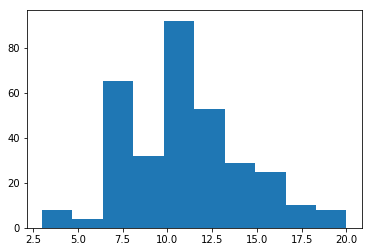

(1.1349693251533743, -100, 103, 2.0)


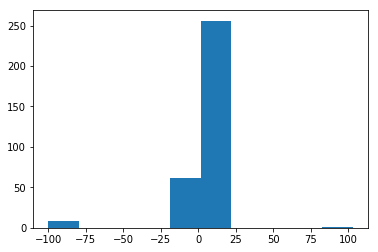

In [184]:
x, y = batch_sampler.x_train, batch_sampler.y_train
describe(x)

(11.487179487179487, 4, 19, 11.0)


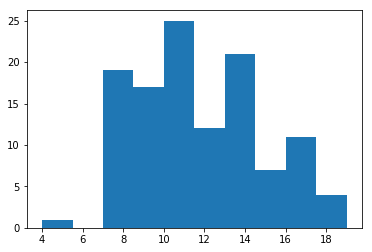

(2.8803418803418803, -100, 17, 2.0)


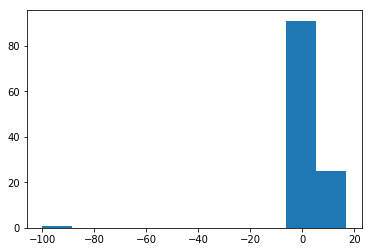

In [185]:
x, y = batch_sampler.x_test, batch_sampler.y_test
describe(x)

In [186]:
import gc
gc.collect()

10623

In [187]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 55 and len(result_for_handle) <= 70}

In [188]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
            else:
                print("Failed")
    
    data[handle] = current

In [189]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.75)

(8.9581589958159, 0, 18, 9.0)


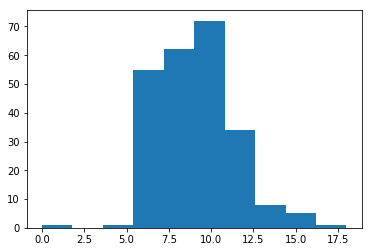

(6.050209205020921, -100, 32, 6.0)


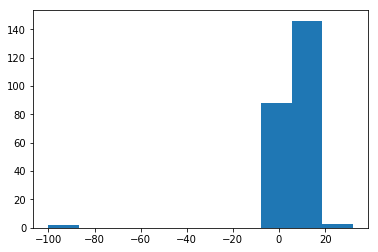

In [190]:
x, y = batch_sampler.x_train, batch_sampler.y_train
describe(x)

(9.072289156626505, 5, 18, 9.0)


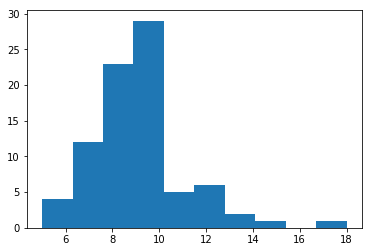

(5.481927710843373, -100, 39, 6.0)


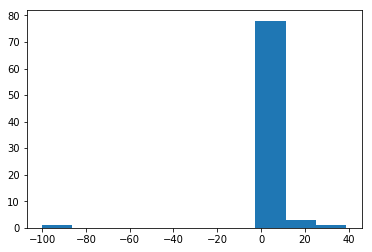

In [191]:
x, y = batch_sampler.x_test, batch_sampler.y_test
describe(x)